### EDA

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("problem1.csv")
df.head(3)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1


#target : y컬럼

<AxesSubplot:xlabel='target', ylabel='count'>

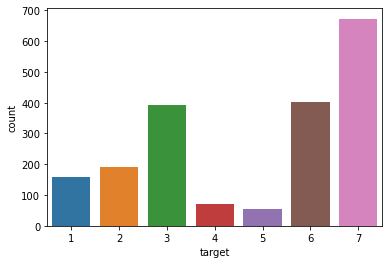

In [2]:
import seaborn as sns
sns.countplot(x='target', data=df)

y분포확인

In [3]:
df_cor=df.drop(columns=['target']).corr(method='pearson')

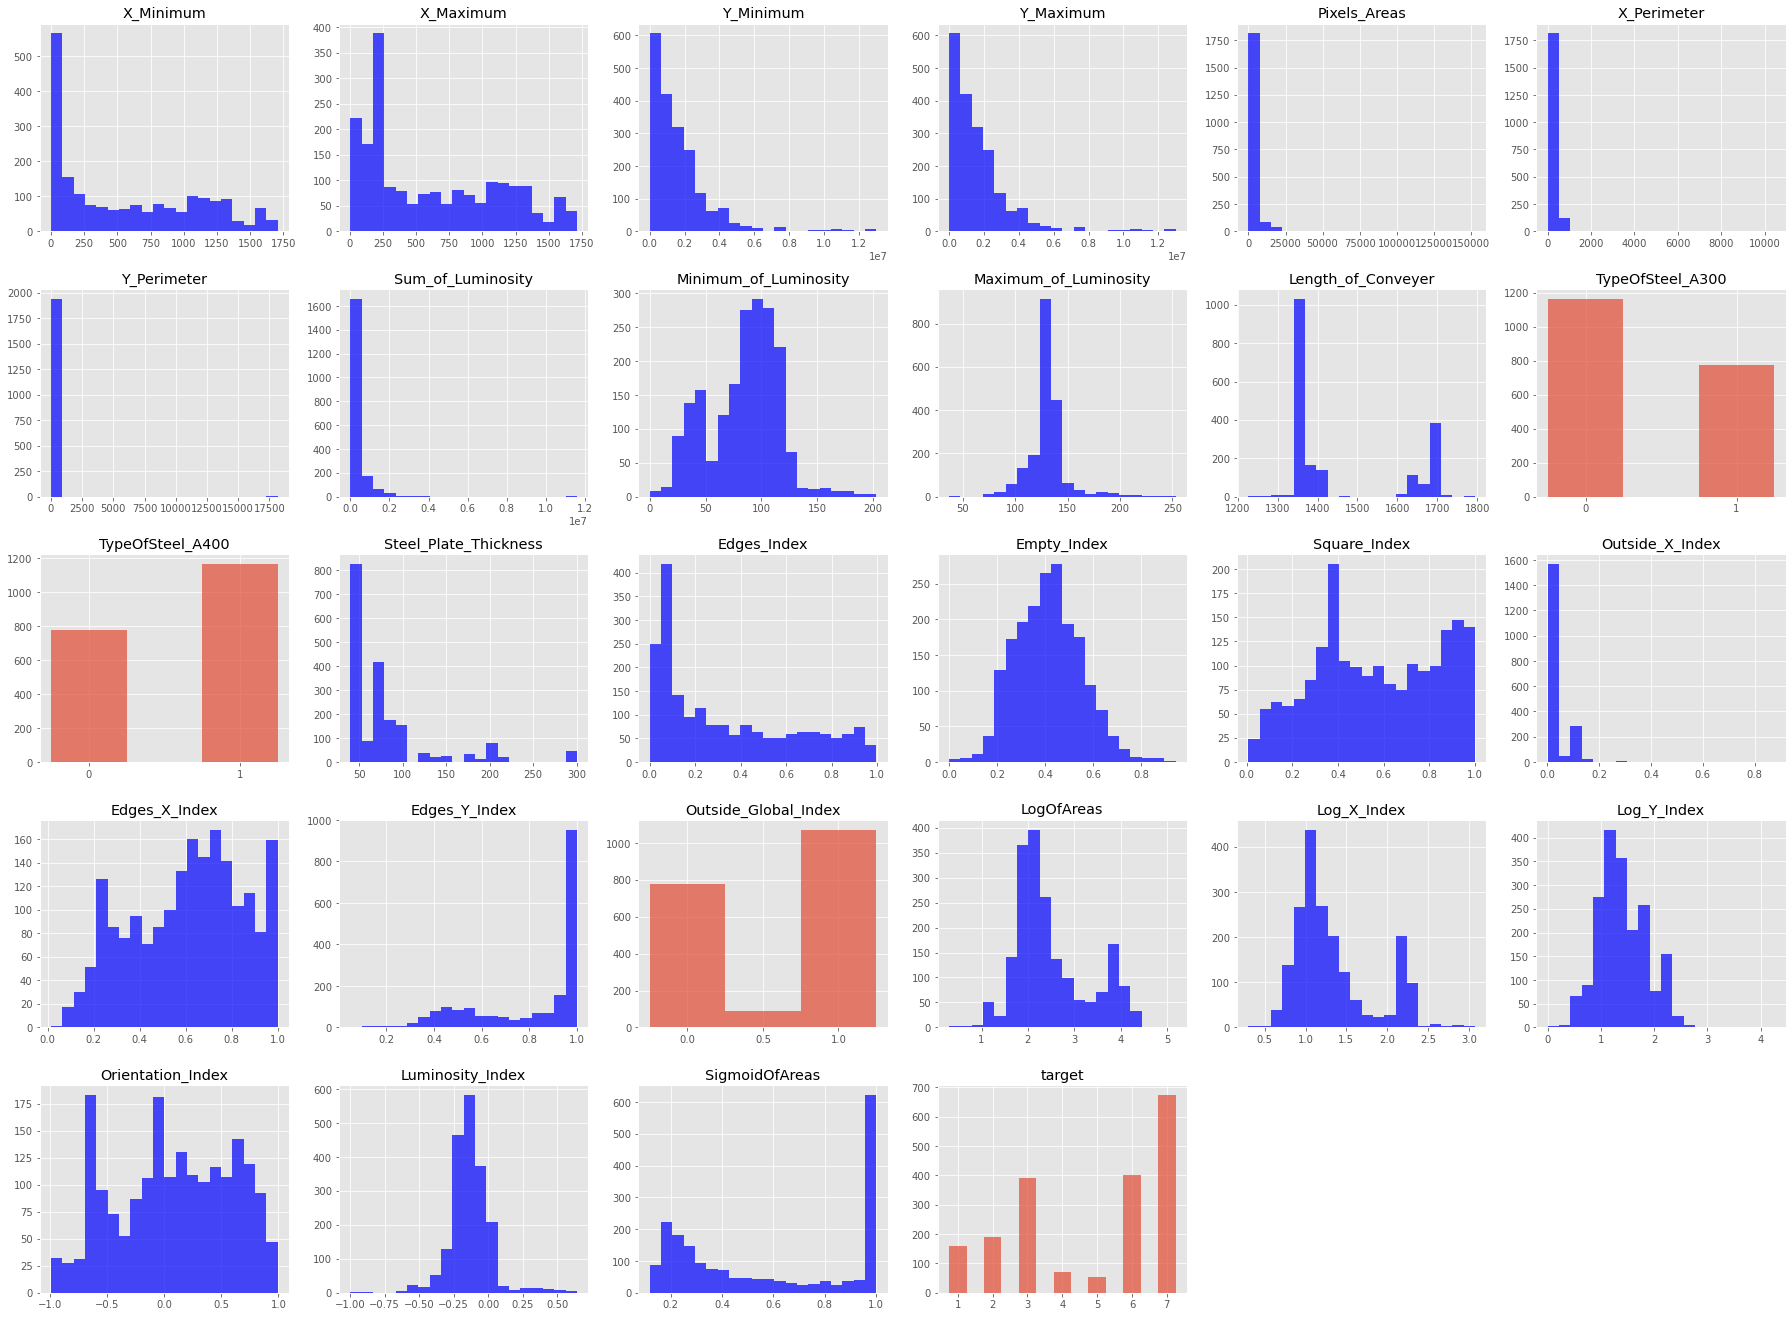

In [4]:
plt.style.use('ggplot')
plt.figure(figsize=(25,20))

cols=df.columns
for i in range(len(cols)):
    plt.subplot(5,6,i+1)
    plt.title(cols[i])
    if len(df[cols[i]].unique())>7:
        plt.hist(df[cols[i]], bins=20, color='b', alpha=0.7)
        
    else:
        temp=df[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
        
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- 변수 선택(VIF), 파생변수 생성, 데이터 분할

In [5]:
from statsmodels.formula.api import ols

from statsmodels.stats.outliers_influence import variance_inflation_factor

df['average']=(df['X_Minimum']+df['X_Maximum'])/2

value="+".join(list(df.drop(columns=['target']).columns))

model=ols(f'target~{value}', data=df)

#회귀계수
model.exog_names

['Intercept',
 'X_Minimum',
 'X_Maximum',
 'Y_Minimum',
 'Y_Maximum',
 'Pixels_Areas',
 'X_Perimeter',
 'Y_Perimeter',
 'Sum_of_Luminosity',
 'Minimum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Length_of_Conveyer',
 'TypeOfSteel_A300',
 'TypeOfSteel_A400',
 'Steel_Plate_Thickness',
 'Edges_Index',
 'Empty_Index',
 'Square_Index',
 'Outside_X_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'Outside_Global_Index',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Orientation_Index',
 'Luminosity_Index',
 'SigmoidOfAreas',
 'average']

In [6]:
vif=pd.DataFrame({'col':col, 'VIF':variance_inflation_factor(model.exog, i)} for i, col in enumerate(model.exog_names[1:]))\
.sort_values("VIF", ascending=False)
vif

,col,VIF
13,Steel_Plate_Thickness,inf
1,X_Maximum,inf
2,Y_Minimum,inf
12,TypeOfSteel_A400,inf
4,Pixels_Areas,1.703264e+10
3,Y_Maximum,1.703244e+10
7,Sum_of_Luminosity,1.559205e+03
22,Log_X_Index,1.185824e+03
18,Edges_X_Index,1.000563e+03
23,Log_Y_Index,4.911691e+02


vif가 10미만인 변수가 다중공선성이 없다고 판단

In [7]:
list=list(vif[vif['VIF']<10]['col'].values)

In [8]:
df2=df.copy()[list+['target']]
df2

,average,Outside_Global_Index,Maximum_of_Luminosity,Length_of_Conveyer,LogOfAreas,Edges_Y_Index,TypeOfSteel_A300,Outside_X_Index,Empty_Index,Edges_Index,X_Minimum,target
0,46.0,1.0,108,1687,2.4265,1.0000,1,0.0047,0.2415,0.0498,42,1
1,648.0,1.0,123,1687,2.0334,0.9667,1,0.0036,0.3793,0.7647,645,1
2,832.0,1.0,125,1623,1.8513,0.9474,1,0.0037,0.3426,0.9710,829,1
3,856.5,1.0,126,1353,2.2455,1.0000,0,0.0052,0.4413,0.7287,853,1
4,1297.5,1.0,126,1353,3.3818,0.9885,0,0.0126,0.4486,0.0695,1289,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1936,263.0,0.0,141,1360,2.4362,0.7273,0,0.0206,0.3906,0.3662,249,7
1937,159.5,0.0,133,1360,2.4579,0.7083,0,0.0228,0.4554,0.2118,144,7
1938,159.5,0.0,140,1360,2.4654,0.6818,0,0.0213,0.3287,0.2132,145,7
1939,153.5,0.0,140,1360,2.6222,0.6596,0,0.0243,0.5904,0.2015,137,7


In [9]:
from sklearn.model_selection import train_test_split
X=df2.drop(columns=['target'])
y=df2[['target']]

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=32, test_size=0.2, stratify=y)

<AxesSubplot:xlabel='target', ylabel='count'>

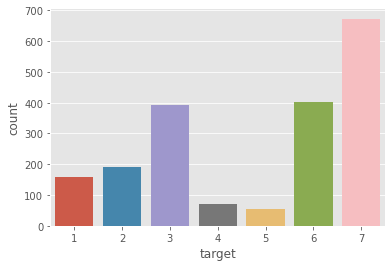

In [10]:
import seaborn as sns
sns.countplot(x='target', data=df)

In [11]:
y_train1=y_train.copy()
y_test1=y_test.copy()

y_train1[y_train1['target']!=1]=0
y_test1[y_test1['target']!=1]=0

<AxesSubplot:xlabel='target', ylabel='count'>

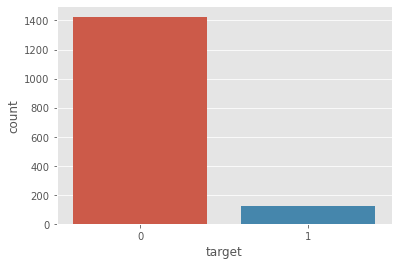

In [12]:
sns.countplot(x='target', data=y_train1)

In [13]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear')
model.fit(X_train, y_train1)

pred=model.predict(X_test)
y_prob=model.predict_proba(X_test)

from sklearn.metrics import classification_report, roc_curve

print(model.score(X_train, y_train1))
print(classification_report(y_test1, pred))

0.9259020618556701
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       357
           1       0.33      0.06      0.11        32

    accuracy                           0.91       389
   macro avg       0.63      0.53      0.53       389
weighted avg       0.87      0.91      0.88       389



0.5256477591036415


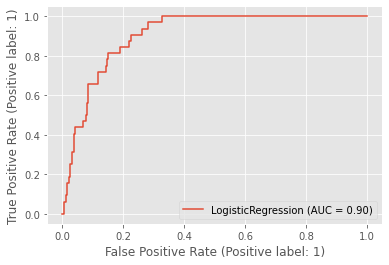

In [14]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
import matplotlib.pyplot as plt

print(roc_auc_score(y_test1, pred))
plot_roc_curve(model, X_test, y_test1)
plt.show()

In [15]:
fpr, tpr, thresholds=roc_curve(y_test1.values, y_prob[:,1], pos_label=1)
J=tpr-fpr
ix=np.argmax(J)
cutoff=thresholds[ix]
cutoff

0.07214838853961467

- svm을 포함한 3가지 분류 알고리즘

In [21]:
X=df2.drop(columns='target')
y=df2[['target']]

X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42)

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import sklearn.svm as svm

log=LogisticRegression()
xgb=XGBClassifier(random_state=0)
from sklearn.svm import LinearSVC
svm_clf=LinearSVC(random_state=42)

In [22]:
from sklearn.metrics import accuracy_score
import time

def model_result(model):
    model.fit(X_train, y_train)
    
    pred=model.predict(X_test)
    print(accuracy_score(y_test, pred))

In [18]:
model_result(log)

0.4609053497942387


In [24]:
model_result(xgb)

[00:40:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7510288065843621


In [23]:
model_result(svm_clf)

0.257201646090535


->xgb가 성능이 가장 좋았다

### 군집분석

In [16]:
from sklearn.model_selection import train_test_split

X=df2.drop(columns=['target'])
y=df2[['target']]

X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, test_size=0.2)

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score

for k in range(2,10):
    kmeans_model=KMeans(n_clusters=k, random_state=1).fit(X_train)
    labels=kmeans_model.labels_
    print(calinski_harabasz_score(X_train, labels))

5495.276557646846
5787.436614717948
6083.140806082669
6124.981281756026
6087.929239517734
6061.865718289135
6232.727526081412
6440.70815437511


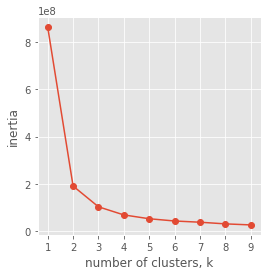

In [18]:
lst=[]
for k in range(1,10):
    model=KMeans(n_clusters=k)
    model.fit(X_train)
    lst.append(model.inertia_)

plt.figure(figsize=(4,4))
plt.plot(range(1,10), lst, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(range(1,10))
plt.show()

k=3이 적절한 것을 확인

In [19]:
cluster_model=KMeans(n_clusters=3, random_state=42, algorithm='auto')
values=cluster_model.fit_predict(X_train) #X_train->군집 예측

X_train_cluster=X_train.reset_index(drop=True).copy()
X_test_cluster=X_test.reset_index(drop=True).copy()

X_train_cluster.loc[:, 'cluster']=values #예측된 군집 X_train에 넣넣
pred=cluster_model.predict(X_test)
X_test_cluster.loc[:, 'cluster']=pred

In [20]:
# X_train_cluster, X_test_cluster, y_train, y_test
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf=RandomForestClassifier(random_state=42)
rf.fit(X_train_cluster, y_train)
print(accuracy_score(y_test, rf.predict(X_test_cluster)))

0.7455012853470437


군집분석 후 분류모델이 더 성능이 좋음